In [1]:
import pandas as pd
import sqlite3

1. 투수들의 기록중에서 평균자책점(ERA), 투구인닝(IP), 탈삼진(SO) 기록을 찾아서  Pitcher_stats 란 테이블을 만들고, Eagles 테이블과 Join 하여 백넘버, 선수명, 포지션, 투구인닝, 평균자책점, 탈삼진 필드를 갖는 데이터 프레임을 만들어서 Join 한 결과를 입력하고, 그 결과를 보이시오.


In [4]:
 # Table 지우기
conn = sqlite3.connect('Users.db') 
cur = conn.cursor()
cur.execute('DROP TABLE Users') 
conn.commit()
conn.close()

In [3]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        conn.close()
 
create_connection("Eagles.db")

In [5]:
conn = sqlite3.connect('Eagles.db')
cur = conn.cursor()
cur.execute('CREATE TABLE Eagles (back_no INT NOT NULL, player TEXT, position TEXT, hands TEXT, highschool TEXT,height INT);')

sql = "insert into Eagles (back_no, player, position, hands, highschool,height) values (?,?,?,?,?,?)"

df = pd.read_csv('hitter.csv', engine='python')

for i in range(5):
    cur.execute(sql, (df.values[i]))
conn.commit()    

cur.execute('SELECT * FROM Eagles')
print(cur.fetchall())

[(17, '김범수', '투수', '좌투좌타', '천안북일고', 181), (38, '안영명', '투수', '우투우타', '천안북일고', 183), (36, '장민재', '투수', '우투우타', '광주제일고', 184), (13, '최재훈', '포수', '우투우타', '덕수고', 178), (52, '김태균', '내야수', '우투우타', '천안북일고', 185)]


In [15]:
conn = sqlite3.connect('Eagles.db')
cur = conn.cursor()
cur.execute('CREATE TABLE Pitcher (player TEXT, position TEXT, ERA FLOAT, IP TEXT,SO INT);')

sql = "insert into Pitcher (player, position, ERA, IP,SO) values (?,?,?,?,?)"

df = pd.read_csv('pitcher.csv', engine='python')

for i in range(24):
    cur.execute(sql, (df.values[i]))
conn.commit()    

cur.execute('SELECT * FROM Eagles')
print(cur.fetchall())

[(17, '김범수', '투수', '좌투좌타', '천안북일고', 181), (38, '안영명', '투수', '우투우타', '천안북일고', 183), (36, '장민재', '투수', '우투우타', '광주제일고', 184), (13, '최재훈', '포수', '우투우타', '덕수고', 178), (52, '김태균', '내야수', '우투우타', '천안북일고', 185)]


In [23]:
conn = sqlite3.connect('Eagles.db')
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles JOIN Pitcher ON Eagles.player LIKE Pitcher.player')
list_  = cur.fetchall()
pd.DataFrame(list_)

,0,1,2,3,4,5,6,7,8,9,10
0,17,김범수,투수,좌투좌타,천안북일고,181,김범수,투수,5.67,81,65
1,38,안영명,투수,우투우타,천안북일고,183,안영명,투수,3.43,44 2/3,35
2,36,장민재,투수,우투우타,광주제일고,184,장민재,투수,4.81,91 2/3,84


In [24]:
conn.close()


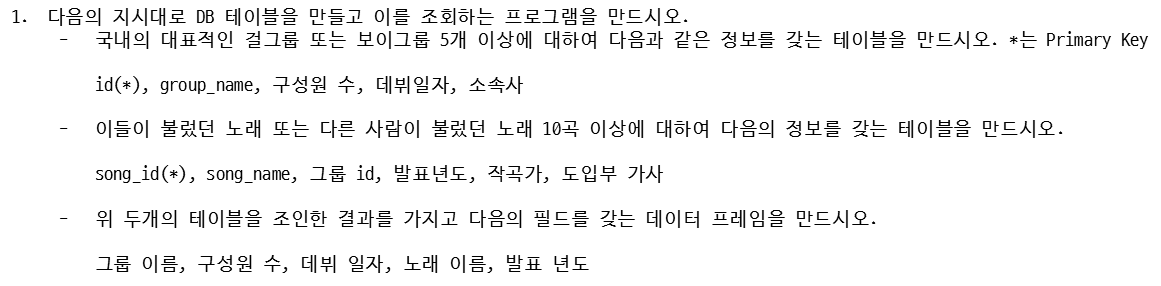

In [25]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        conn.close()
 
create_connection("Singer.db")

2.6.0


In [43]:
girlgroup = pd.read_csv('girl_group.csv',engine = 'python')

In [44]:
song = pd.read_csv('song.csv',engine = 'python')

In [50]:
conn = sqlite3.connect('Singer.db')
cur = conn.cursor()
cur.execute('CREATE TABLE girlgroup (id INT NOT NULL, group_name TEXT, debut DATETIME, member INT, company TEXT, PRIMARY KEY(id));')

sql = "insert into girlgroup (id, group_name, debut, member, company) values (?,?,?,?,?)"

for i in range(8):
    cur.execute(sql, (girlgroup.values[i]))
conn.commit()    

cur.execute('SELECT * FROM girlgroup')
print(cur.fetchall())

[(101, '원더걸스', '2007-02-10', 5, 'jyp'), (102, '소녀시대', '2007-08-02', 8, 'sm'), (103, '카라', '2009-07-30', 5, 'sec'), (104, '브라운아이드걸스', '2008-01-17', 4, 'melon'), (105, '다비치', '2009-02-27', 2, 'samsung'), (107, '2NE1', '2009-07-08', 4, 'yg'), (109, 'f(x)', '2011-04-20', 4, 'sm'), (110, '시크릿', '2011-01-06', 5, 'lg')]


In [51]:
conn = sqlite3.connect('Singer.db')
cur = conn.cursor()
cur.execute('CREATE TABLE song (songid INT NOT NULL,goupid INT, song_name TEXT, lyric TEXT, writer TEXT, year INT, PRIMARY KEY(songid));')

sql = "insert into song (songid,goupid, song_name, lyric, writer, year) values (?,?,?,?,?,?)"

for i in range(16):
    cur.execute(sql, (song.values[i]))
conn.commit()    

cur.execute('SELECT * FROM song')
print(cur.fetchall())

[(1, 101, 'Tell Me', 'tell me tell me tetetete tel me', 'sec', 2008), (2, 102, 'Gee', 'GEE GEE GEE GEE GEE BABY BABY', 'sec', 2009), (3, 103, '미스터', '이름이 뭐야 미스터', 'jyp', 2010), (4, 104, 'Abracadabra', '이러다 미쳐 내가 여리여리', 'psy', 2007), (5, 105, '8282', 'Give me a call Baby baby', 'lsm', 2006), (6, 106, '기대해', '기대해', 'lsm', 2010), (7, 107, "I Don't car", '다른 여자들의 다리를', 'sec', 2008), (8, 108, 'Bad Girl Good Girl', '앞에선 한 마디 말도', 'jyp', 2007), (9, 109, '피노키오', '뉴예삐오', 'psy', 2012), (10, 110, '별빛달빛', '너는 내 별빛 내 마음의 별빛', 'sec', 2011), (11, 111, 'A', 'A 워오우 워오우워 우우우', 'sec', 2013), (12, 112, '나혼자', '나 혼자 밥을 먹고 나 혼자 영화 보고', 'jyp', 2010), (13, 113, 'LUV', '설레이나요', 'sec', 2015), (14, 114, '짧은치마', '짧은 치마를 입고 내가 길을 걸으면', 'jyp', 2014), (15, 115, '위아래', '위 아래 위위 아래', 'psy', 2016), (16, 116, 'Dumb Dumb', '너 땜에 하루종일', 'sec', 2016)]


In [53]:
conn = sqlite3.connect('Singer.db')
cur = conn.cursor()
cur.execute('SELECT * FROM girlgroup JOIN song ON girlgroup.id LIKE song.goupid')
list_  = cur.fetchall()
pd.DataFrame(list_)

,0,1,2,3,4,5,6,7,8,9,10
0,101,원더걸스,2007-02-10,5,jyp,1,101,Tell Me,tell me tell me tetetete tel me,sec,2008
1,102,소녀시대,2007-08-02,8,sm,2,102,Gee,GEE GEE GEE GEE GEE BABY BABY,sec,2009
2,103,카라,2009-07-30,5,sec,3,103,미스터,이름이 뭐야 미스터,jyp,2010
3,104,브라운아이드걸스,2008-01-17,4,melon,4,104,Abracadabra,이러다 미쳐 내가 여리여리,psy,2007
4,105,다비치,2009-02-27,2,samsung,5,105,8282,Give me a call Baby baby,lsm,2006
5,107,2NE1,2009-07-08,4,yg,7,107,I Don't car,다른 여자들의 다리를,sec,2008
6,109,f(x),2011-04-20,4,sm,9,109,피노키오,뉴예삐오,psy,2012
7,110,시크릿,2011-01-06,5,lg,10,110,별빛달빛,너는 내 별빛 내 마음의 별빛,sec,2011


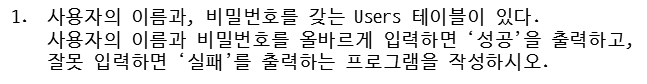

In [5]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        conn.close()
 
create_connection("Users.db")

2.6.0


In [6]:
conn = sqlite3.connect('Users.db')
cur = conn.cursor()
cur.execute('CREATE TABLE Users (id TEXT, pw TEXT,PRIMARY KEY(id));')

sql = "insert into Users (id,pw) values (?,?)"

cur.execute(sql, ('신은총', '잘생김'))
cur.execute(sql, ('박진원','못생김'))


conn.commit()

In [11]:
conn = sqlite3.connect('Users.db')
cur = conn.cursor()
cur.execute('SELECT * FROM Users')
print(cur.fetchall())

[('신은총', '잘생김'), ('박진원', '못생김')]


In [54]:
def login(id_,password):
    conn = sqlite3.connect('Users.db')
    cur = conn.cursor()
    cur.execute("SELECT * FROM Users WHERE id=?",[id_])
    user = cur.fetchone()
    if user[1] != password:
        return print('로그인에 실패하셨습니다.')
    
    print('축하합니다! 로그인에 성공하셨습니다!')

In [57]:
login('박진원', '못생김')

축하합니다! 로그인에 성공하셨습니다!


In [58]:
login('신은총', '못생김')

로그인에 실패하셨습니다.
